<font size = 6><b> PFE </b></font>

Adds

--

<font size = 4><b> Imports</b></font>

--

In [1]:
import os
import pandas

# on se crée une liste d'adresses disques contenant les vidéos
listeAdresse = ['./data/x264-1908-caire-wasm/x264-results1.csv',
 './data/x264-0408-deadline-wasm/x264-results1.csv',
 './data/x264-0308-news-wasm/x264-results1.csv',
 './data/x264-2108-forester-wasm/x264-results1.csv',
 './data/x264-0308-crowd_run-wasm/x264-results1.csv',
 './data/x264-1908-flower-wasm/x264-results1.csv',
 './data/x264-0308-mobilesif-wasm/x264-results1.csv',
 './data/x264-1908-footballcif-wasm/x264-results1.csv',
 './data/x264-2108-netflix-wasm/x264-results1.csv',
 './data/x264-1908-husky-wasm/x264-results1.csv',
 './data/x264-0608-people-wasm/x264-results1.csv',
 './data/x264-1908-bridgefar-wasm/x264-results1.csv',
 './data/x264-0308-sintel-wasm/x264-results1.csv',
 './data/x264-2108-bridgeclose-wasm/x264-results1.csv',
 './data/x264-0408-tos3k-wasm/x264-results1.csv',
 './data/x264-0208-crowd_run-bermuda-wasm/x264-results1.csv',
 './data/x264-0608-coastmp4-wasm-merged/x264-results1.csv',
 './data/x264-2108-ghotism-wasm/x264-results1.csv',
 './data/x264-0508-soccer-wasm/x264-results1.csv',
 './data/x264-0208-sintel-calda-wasm/x264-results1.csv',
 './data/x264-1908-ice-wasm/x264-results1.csv',
 './data/x264-0408-football-wasm/x264-results1.csv',
 './data/x264-1908-tennis-wasm/x264-results1.csv',
 './data/x264-1908-mobilepro-wasm/x264-results1.csv',
 './data/x264-1908-akiyo-wasm/x264-results1.csv',
 './data/x264-0608-park-wasm/x264-results1.csv',
 './data/x264-0608-blue-wasm/x264-results1.csv',
 './data/x264-1908-riverbed-wasm/x264-results1.csv',
 './data/x264-0608-tractor-wasm/x264-results1.csv',
 './data/x264-1908-football15-wasm/x264-results1.csv',
 './data/x264-1908-sunflowers-wasm/x264-results1.csv',
 './data/x264-0308-ducks-wasm/x264-results1.csv',
 './data/x264-1908-waterfall-wasm/x264-results1.csv',
 './data/x264-1908-students-wasm/x264-results1.csv']

#on crée ensuite la liste des données sur chacune des vidéos
listeVideo = []

for adresse in listeAdresse:
    listeVideo.append(pandas.read_csv(open(adresse,"r")))

# on teste l'affichage des données de la première vidéo
listeVideo[0][0:5]
    

,configurationID,H264,no_8x8dct,no_asm,no_cabac,no_deblock,no_fast_pskip,no_mbtree,no_mixed_refs,no_weightb,rc_lookahead,ref,size,usertime,systemtime,elapsedtime
0,1,True,True,False,False,True,True,False,True,True,20,9,78801,1.336,0.068,0.695
1,10,True,True,False,True,False,True,False,False,True,40,9,86351,1.588,0.064,0.603
2,100,True,True,False,False,True,False,True,True,False,40,1,90758,0.928,0.036,0.284
3,1000,True,True,False,True,False,True,True,True,False,40,9,98511,1.348,0.020,0.415
4,1001,True,False,False,False,True,False,False,True,False,60,5,85191,1.072,0.044,0.362


<font size = 4><b> Configurations sorting</b></font>

--

In [2]:
dico = {}
for i in listeVideo:
    for j in range(len(i)):
        if i["configurationID"][j] not in dico.keys():
            dico[i["configurationID"][j]]=i["elapsedtime"][j]
        else : 
            dico[i["configurationID"][j]]=dico[i["configurationID"][j]]+i["elapsedtime"][j]            
            

In [3]:
dico2 = {}
for i in listeVideo:
    for j in range(len(i)):
        if i["configurationID"][j] not in dico2.keys():
            dico2[i["configurationID"][j]]=[i["elapsedtime"][j]]
        else : 
            dico2[i["configurationID"][j]].append(i["elapsedtime"][j])
        

In [4]:
res = pandas.DataFrame.from_dict(dico, orient='index')
res.reset_index(inplace= True)
res.columns=['configid','sum']
res.sort_values("sum",inplace=True)
print(res[0:2])
print("...")
print(res[1150:1152])

     configid      sum
24        102  177.912
687       580  177.920
...
     configid      sum
492       404  435.296
627       526  439.314


We add all the time of all inputs, and calculate the sum of it by config before sorting.
We can see that the difference between the first and the last configurations (*2.5 in time)

In [5]:
res2 = pandas.DataFrame.from_dict(dico2, orient='index')
res2.sum(axis = 1)
res3 = res2.transpose()
res3.describe().transpose()[0:5]

,count,mean,std,min,25%,50%,75%,max
1,34.0,9.651235,14.197951,0.562,1.13000,4.3055,11.13850,62.680
10,34.0,11.879971,17.718627,0.398,1.23725,5.1540,15.32875,80.826
100,34.0,5.354412,8.123048,0.198,0.54625,2.3240,5.61200,37.788
1000,34.0,9.044088,13.970402,0.316,0.80375,3.7630,10.39825,62.944
1001,34.0,7.768912,11.369338,0.246,0.84300,3.5625,9.04375,51.567


<font size = 4><b> Correlations matrix about Kullback-Leiber divergence </b></font>

--

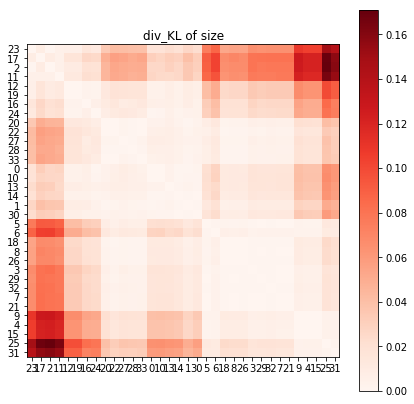

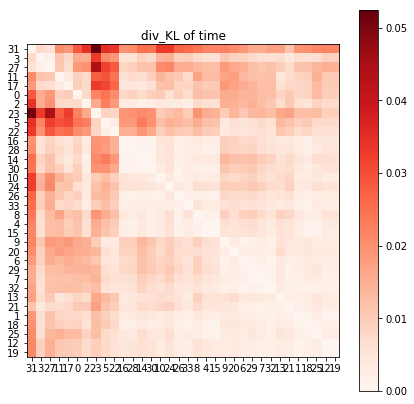

In [7]:
import scipy.stats as sc
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

taille = len(listeVideo)

divKLTaille = [[0 for x in range(taille)] for y in range(taille)]
divKLTaille2 = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        divKLTaille[i][j] = sc.entropy(pk=listeVideo[i]['size'],
                                       qk=listeVideo[j]['size'])

indiceTaille = dendrogram(linkage(divKLTaille, 'ward'), no_plot=True)['leaves']

for i in range(taille):
    for j in range(taille):
        divKLTaille2[i][j] = sc.entropy(pk=listeVideo[indiceTaille[i]]['size'],
                                        qk=listeVideo[indiceTaille[j]]['size'])
        
plt.subplots(figsize=(7, 7))
plt.imshow(divKLTaille2,cmap='Reds',interpolation='nearest')
plt.title('div_KL of size')
plt.xticks(range(len(indiceTaille)),indiceTaille)
plt.yticks(range(len(indiceTaille)), indiceTaille)
plt.colorbar()
plt.show()

divKLTemps = [[0 for x in range(taille)] for y in range(taille)]
divKLTemps2 = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        divKLTemps[i][j] = sc.entropy(pk=listeVideo[i]['elapsedtime'],
                                      qk=listeVideo[j]['elapsedtime'])
        
indiceTemps = dendrogram(linkage(divKLTemps, 'ward'), no_plot=True)['leaves']

for i in range(taille):
    for j in range(taille):
        divKLTemps2[i][j] = sc.entropy(pk=listeVideo[indiceTemps[i]]['elapsedtime'],
                                       qk=listeVideo[indiceTemps[j]]['elapsedtime'])

plt.subplots(figsize=(7, 7))
plt.imshow(divKLTemps2,cmap='Reds',interpolation='nearest')
plt.title('div_KL of time')
plt.xticks(range(len(indiceTemps)),indiceTemps)
plt.yticks(range(len(indiceTemps)), indiceTemps)
plt.colorbar()
plt.show()

We need one mean to compare all the clustering we have done. What differency them?

<font size = 4><b> General function for transfering video i on video j </b></font>

--

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC, SVR
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor

def transfer(var,varexp1,varexp2,i,j,testSize,method):
    # where var is either 'size' or 'elapsedtime'
    # varexp1 & varexp2 two parameter of configuration
    # i is the number of the "learning" video
    # j is the video which will benefits from the learning of i
    # testSize is the size of the test dataset (70 for 70% of tests)
    # method is 'sv' for support vector, 'rf' for random forest, 'reg' for regression

    st = testSize/100
    
    # Split the targets into training/testing sets
    x_train, x_test, y_train, y_test = train_test_split(listeVideo[i][[var, varexp1,varexp2]], 
                                                        listeVideo[j][var], 
                                                        test_size= st, 
                                                        random_state=0)
    
    #choose the method
    if method == 'reg':
        clf = linear_model.LinearRegression()
        
    if method == 'rf':
        clf = RandomForestRegressor(n_estimators=20)
        
    if method == 'sv':
        clf = SVC(kernel='rbf', C=1e10, gamma=1e-8)
      
    # Apply the model to the training datasets and predict for the testing dataset
    y_pred = clf.fit(x_train, y_train).predict(x_test)
    
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))

    # Then we plot the prediction vs the reality
    plt.scatter(x_test['size'], y_test,  color='black')
    plt.scatter(x_test['size'], y_pred,  color='red')
    plt.xticks(())
    plt.yticks(())
    plt.show()

We test the function on tranfer with video 1 and video 5

svm
Variance score: 0.63


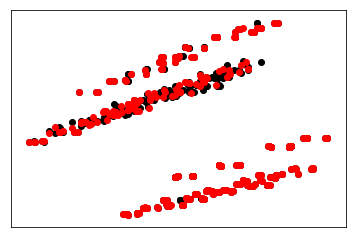

reg
Variance score: 0.94


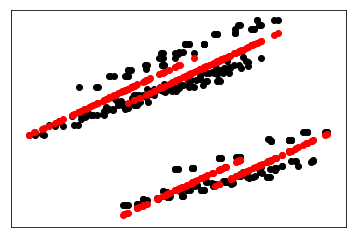

random forest
Variance score: 0.97


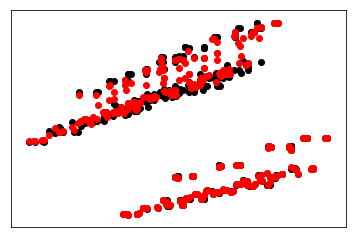

In [95]:
print("svm")
transfer('size','no_mbtree','no_cabac',1,6,30,'sv')
print("reg")
transfer('size','no_mbtree','no_cabac',1,6,30,'reg')
print("random forest")
transfer('size','no_mbtree','no_cabac',1,6,30,'rf')

<font size = 4><b> Comparison of simple learning vs tranfer learning </b></font>

--

In [23]:
# Tracer évolution r2 des modèles selon taille échantillon avec learning simple à partir de random forest sur le temps
# Learning simple à partir de random forest sur la taille
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas
from matplotlib import pyplot as plt

source = listeVideo[0]

r2_learning_double = []
for aux in listeVideo:
    x = np.asarray(source[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime']])
    y = np.ravel(aux['elapsedtime'])

    r2 = []
    for i in range(1,65):
        pct_test = 1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_learning_double.append(r2)

r2_learning_simple = []
for aux in listeVideo:
    x = np.asarray(aux[['H264','no_8x8dct','no_asm','no_cabac','no_deblock',
             'no_fast_pskip','no_mbtree','no_mixed_refs',
             'no_weightb','rc_lookahead','ref','usertime','systemtime']])
    y = np.ravel(aux[['elapsedtime']])

    r2 = []
    for i in range(1,65):
        pct_test=1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_learning_simple.append(r2)

# Pour chaque vidéo, on regarde le r2 avec une taille d'échantillon différente.
data_simple = pandas.DataFrame(data=r2_learning_simple)
# Pour chaque vidéo, on regarde le r2 avec une taille d'échantillon différente.
data_double = pandas.DataFrame(data=r2_learning_double)

<font size = 4><b> Curves of r2_score of prevision in fonction of the training dataset length</b></font>

--

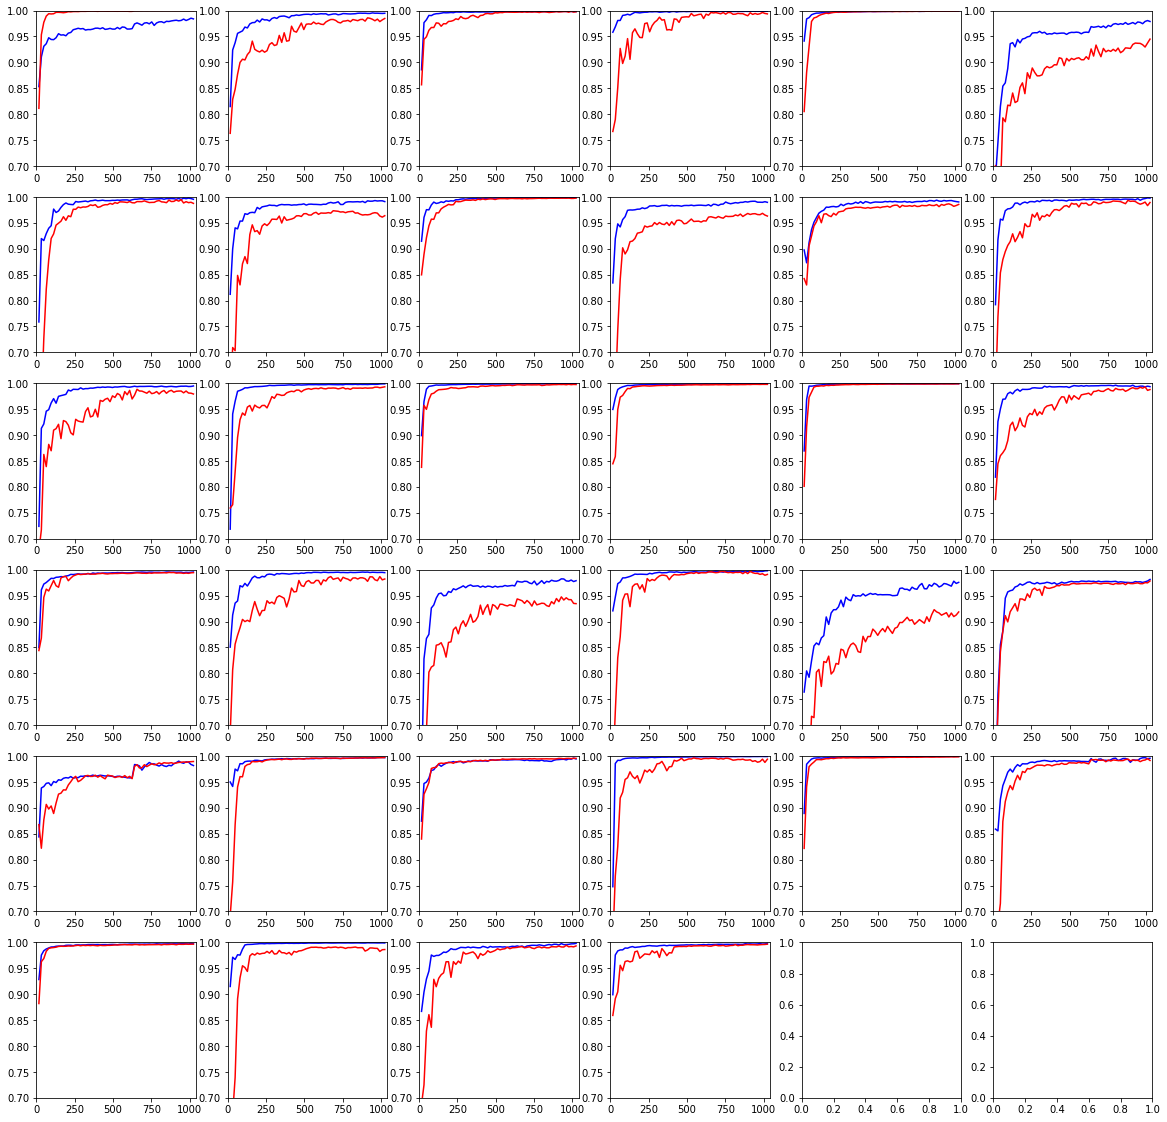

In [24]:
import numpy as np
from matplotlib import pyplot as plt

taille = 6
plt.subplots(nrows=taille,ncols=taille,figsize=(20, 20))

for i in range(taille):
    for j in range(taille):
        plt.subplot(taille,taille,taille*i+j+1)
        x1=np.asarray(data_simple[taille*i+j:taille*i+j+1])
        x2=np.asarray(data_double[taille*i+j:taille*i+j+1])
        if taille*i+j<34:
            plt.axis([0,1040,0.7,1])
            plt.plot(range(16,1040,16),x1[0],c="blue")
            plt.plot(range(16,1040,16),x2[0],c="red")
plt.show()

- Red : tranfer + learning
- Blue : learning

<font size = 4><b> Group of configurations</b></font>

--

In [26]:
classement_general={}
for j in range(len(listeVideo)):
    classement = {}
    liste_temps=listeVideo[j]["elapsedtime"]
    for i in range(len(listeVideo[j]["elapsedtime"])):
        classement[listeVideo[j]["configurationID"][i]]=listeVideo[j]["elapsedtime"][i]
    classement=sorted(classement.items(), key=lambda t:t[1])
    classement_general[j]=classement
len(classement_general)

34

In [29]:
tableau={}
for c in range(1,len(listeVideo[0])+1):
    conf1={}
    for i in range(len(listeVideo)):
        classement_config=0
        for j in range(len(listeVideo[0])):
            if classement_general[i][j][0]==c:
                classement_config = classement_general[i].index(classement_general[i][j])
                
        conf1[i+1] = classement_config
    tableau[c]=conf1

<font size = 4><b> Dataframe of ordering configurations</b></font>

--

In [30]:
tableau2=pandas.DataFrame(data=tableau)
tableau_joli=tableau2.transpose()
tableau_joli
#se lit comme tel : la première configuration est la deuxième moins efficace pour la première vidéo

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
1,1151,953,836,855,907,1151,898,1058,950,1092,...,1151,892,905,722,902,1098,923,741,986,959
2,447,386,412,484,513,482,334,355,544,413,...,442,484,440,461,448,381,464,463,405,442
3,520,508,637,466,443,461,386,293,495,341,...,681,452,500,447,474,371,499,313,410,527
4,322,135,361,136,119,157,193,127,74,147,...,350,190,215,169,168,170,195,156,175,203
5,1108,1108,1138,1055,1046,963,1054,1091,1054,1025,...,1107,1038,1103,1109,1141,1051,1131,989,1049,1119
6,327,218,83,230,311,313,245,278,255,281,...,72,223,253,224,294,283,182,285,208,156
7,383,626,789,783,888,749,679,716,899,753,...,591,851,855,697,852,671,866,686,768,709
8,748,847,757,800,638,588,786,814,600,796,...,838,575,693,851,720,836,731,815,769,730
9,942,855,997,719,836,611,644,689,878,600,...,1029,790,875,666,881,555,913,631,701,901
10,1129,1075,1011,1088,1092,1117,1114,1113,1125,1110,...,1129,1088,1035,1048,1013,1099,1038,1024,1107,1028


In [34]:
groupe={}
for i in range(1,35):
    groupe[i]=tableau_joli.loc[tableau_joli[i]<10].index

<font size = 4><b> Top 10 configurations</b></font>

--

In [33]:
groupe_config={}
for i in (0,9):
    for j in range(1,35):
        l=[]
        for c in range(0,10):
            for k in range(1,35):
                if groupe[j][i]==groupe[k][c]:
                    if groupe[j][i] not in groupe_config.keys():
                        l.append(k)
                        groupe_config[groupe[j][i]]=l
                    else : 
                        groupe_config[groupe[j][i]].append(k)
for i in groupe_config:
    groupe_config[i]=set(groupe_config[i])
groupe_config

{29: {1},
 35: {2},
 39: {25},
 48: {8, 14},
 56: {11, 16, 19, 22, 27},
 57: {6, 7, 23, 33},
 76: {22, 26},
 80: {8, 10, 26},
 88: {19, 22, 29, 32, 34},
 100: {4, 7, 24, 33},
 102: {5, 8, 13, 21, 28, 29, 34},
 133: {7, 10, 20, 26, 33},
 156: {10, 13, 26, 30},
 163: {1, 3, 12, 15, 17, 31},
 257: {5, 11, 16, 18, 27, 34},
 421: {9, 32},
 692: {11, 19, 24, 27, 34},
 716: {19},
 756: {13, 20, 27, 34},
 781: {4, 8, 9, 24},
 822: {12, 17, 25},
 839: {16, 22},
 876: {5, 16, 18, 24, 29},
 903: {15, 31},
 958: {2, 20, 24, 28},
 975: {1, 25},
 995: {4, 27, 28},
 996: {16, 18, 20, 21, 32},
 1019: {18},
 1053: {12, 25},
 1099: {3, 12, 15},
 1107: {3},
 1129: {13, 14, 20, 21},
 1130: {2, 7, 10, 14, 26, 30, 33},
 1131: {2, 6, 7, 8, 23, 32}}